In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [6]:
# Load the dataset
df = pd.read_csv("netflix_pattern.csv")


In [8]:
df.head()

,user,timestamp,service_group,service_name,usage_minutes,usage_percentage,mac_address,device_type,signal_strength,packet_loss_rate,latency,jitter_ms,traffic_spike,bandwidth_speed_per_sec_mbps,buffer_occupancy
0,user1,2024-01-01 00:00:00,Social Media,Instagram,8,39.45,02:00:00:18:6e:65,Tablet,-41.54,0.5787,36.59,7.96,0,9.43,0.7506
1,user2,2024-01-01 00:00:00,Social Media,Facebook,154,96.68,02:00:00:59:56:eb,Tablet,-56.03,0.4392,18.60,0.48,0,11.41,0.4992
2,user1,2024-01-01 00:15:00,Social Media,Twitter,162,46.36,02:00:00:18:6e:65,Tablet,-44.83,0.6700,11.57,9.39,0,5.85,0.9200
3,user2,2024-01-01 00:15:00,Social Media,LinkedIn,151,59.72,02:00:00:59:56:eb,Tablet,-45.67,0.5524,43.24,7.27,0,13.97,0.8858
4,user1,2024-01-01 00:30:00,Social Media,Instagram,4,74.64,02:00:00:18:6e:65,Tablet,-42.82,0.8445,44.68,0.98,0,5.84,0.6746


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("netflix_pattern.csv")

# Convert timestamp to datetime and extract additional information
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'] >= 5
df['day'] = df['timestamp'].dt.date

# Set the style for seaborn
sns.set(style="whitegrid")


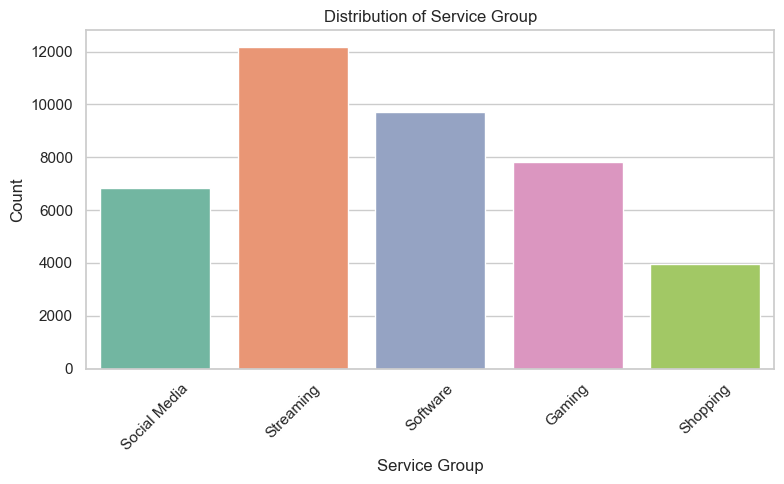

In [12]:

# 1. Distribution of Service Group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='service_group', palette="Set2")
plt.title('Distribution of Service Group')
plt.xlabel('Service Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("distribution_service_group.png")
plt.show()


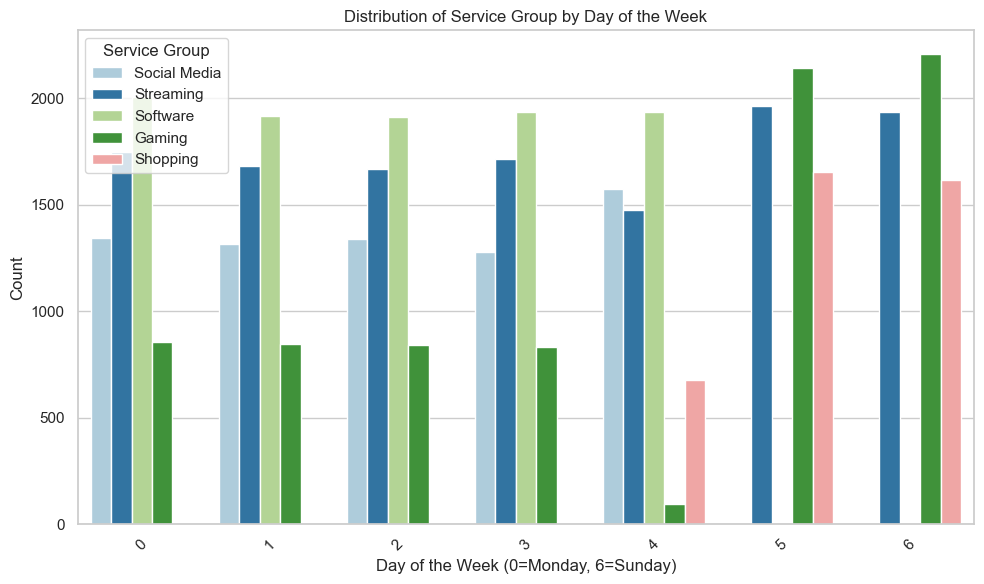

In [13]:

# 2. Count of Each service_group Over Time
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='service_group', palette="Paired")
plt.title('Distribution of Service Group by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Service Group')
plt.tight_layout()
plt.savefig("service_group_by_day_of_week.png")
plt.show()


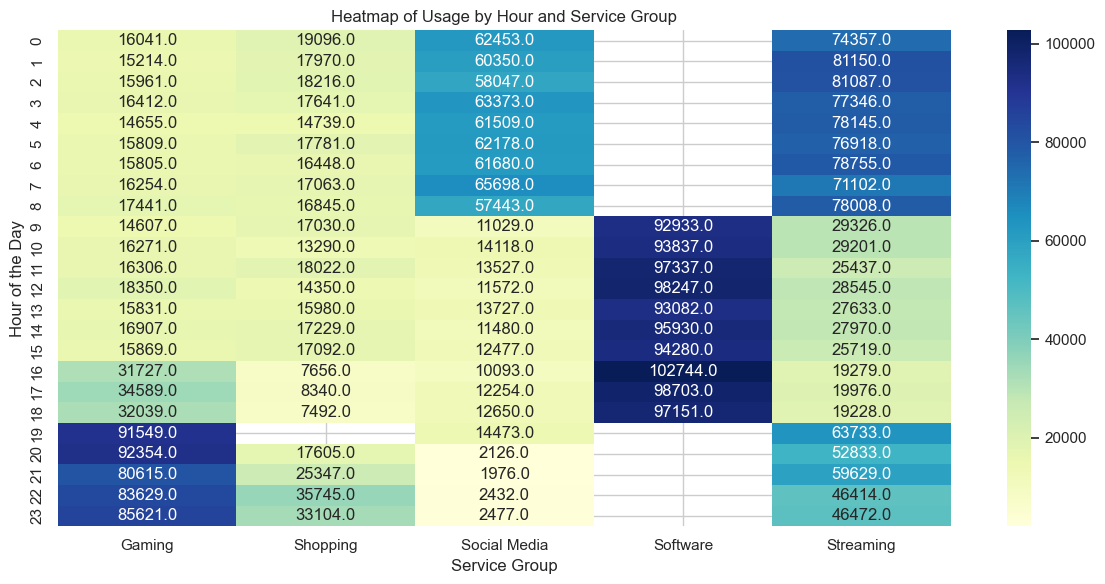

In [14]:

# 3. Heatmap of Usage by Hour and Service Group
plt.figure(figsize=(12, 6))
usage_by_hour_group = df.pivot_table(values='usage_minutes', index='hour', columns='service_group', aggfunc='sum')
sns.heatmap(usage_by_hour_group, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Usage by Hour and Service Group')
plt.xlabel('Service Group')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.savefig("usage_heatmap_hour_service_group.png")
plt.show()


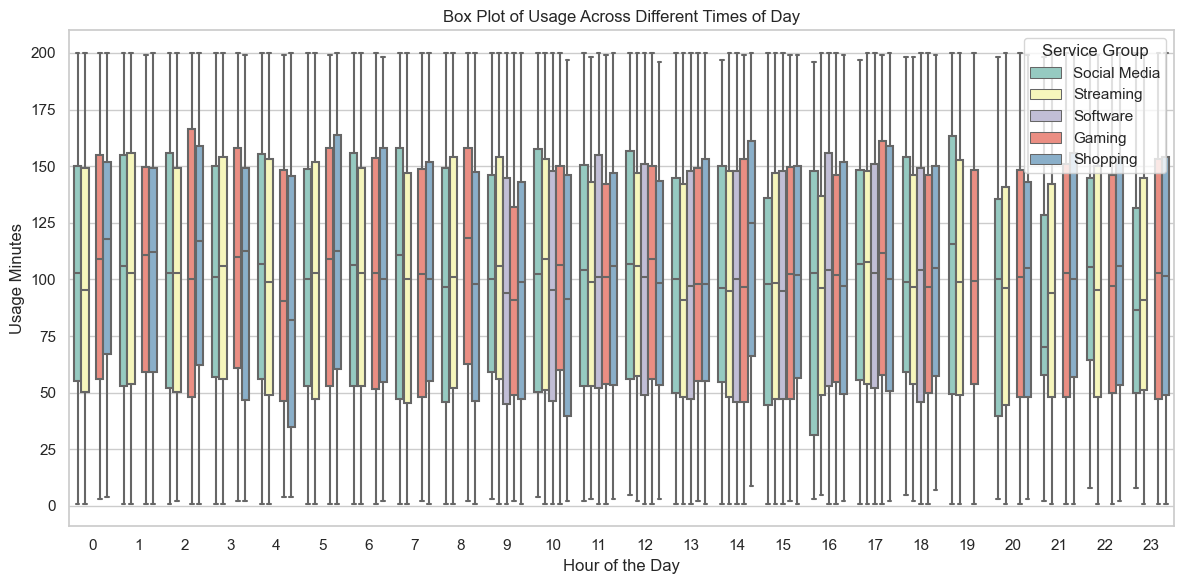

In [15]:

# 4. Box Plot of Usage Across Different Times of Day
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='usage_minutes', hue='service_group', palette="Set3")
plt.title('Box Plot of Usage Across Different Times of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Usage Minutes')
plt.legend(title='Service Group', loc='upper right')
plt.tight_layout()
plt.savefig("boxplot_usage_time_service_group.png")
plt.show()


In [16]:

# 5. Service Name vs Days
plt.figure(figsize=(12, 6))
df.groupby(['day', 'service_name'])['usage_minutes'].sum().unstack().plot(title="Service Name vs Days", ylabel="Usage Minutes", stacked=True)
plt.savefig("service_name_vs_days.png")
plt.close()


<Figure size 1200x600 with 0 Axes>

In [17]:

# 6. Service Name vs Hour
plt.figure(figsize=(12, 6))
df.groupby(['hour', 'service_name'])['usage_minutes'].sum().unstack().plot(title="Service Name vs Hour", ylabel="Usage Minutes", stacked=True)
plt.savefig("service_name_vs_hour.png")
plt.close()


<Figure size 1200x600 with 0 Axes>

In [18]:

# 7. Service Name vs Weekends

plt.figure(figsize=(14, 8))  # Increase figure size
df.groupby(['is_weekend', 'service_name'])['usage_minutes'].sum().unstack().plot(
    kind='bar', stacked=True, title="Service Name vs Weekends", ylabel="Usage Minutes", colormap="tab20"
)
plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)

# Move the legend outside the plot and adjust font size
plt.legend(title='Service Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()  # Adjust layout to fit everything
plt.savefig("service_name_vs_weekends_improved.png")
plt.show()


<Figure size 1200x600 with 0 Axes>

In [19]:

# 8. Service Group vs Days
plt.figure(figsize=(12, 6))
df.groupby(['day', 'service_group'])['usage_minutes'].sum().unstack().plot(title="Service Group vs Days", ylabel="Usage Minutes", stacked=True)
plt.savefig("service_group_vs_days.png")
plt.close()


<Figure size 1200x600 with 0 Axes>

In [20]:

# 9. Service Group vs Hour
plt.figure(figsize=(12, 6))
df.groupby(['hour', 'service_group'])['usage_minutes'].sum().unstack().plot(title="Service Group vs Hour", ylabel="Usage Minutes", stacked=True)
plt.savefig("service_group_vs_hour.png")
plt.close()


<Figure size 1200x600 with 0 Axes>

In [21]:

# 10. Service Group vs Weekends
plt.figure(figsize=(12, 6))
df.groupby(['is_weekend', 'service_group'])['usage_minutes'].sum().unstack().plot(kind='bar', title="Service Group vs Weekends", ylabel="Usage Minutes", stacked=True)
plt.xticks([0, 1], ["Weekday", "Weekend"], rotation=0)
plt.savefig("service_group_vs_weekends.png")
plt.close()


<Figure size 1200x600 with 0 Axes>

In [22]:

# 11. Max Usage by Service Group
def plot_max_usage_service_group():
    plt.figure(figsize=(10, 6))
    usage_data = df.groupby('service_group')['usage_minutes'].sum().sort_values(ascending=False)
    usage_data.plot(kind='bar', title="Max Usage by Service Group", ylabel="Total Usage Minutes", color=plt.cm.Paired.colors)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("max_usage_service_group.png")
    plt.close()


In [23]:

# 12. Min Usage by Service Group
def plot_min_usage_service_group():
    plt.figure(figsize=(10, 6))
    usage_data = df.groupby('service_group')['usage_minutes'].sum().sort_values()
    usage_data.plot(kind='bar', title="Min Usage by Service Group", ylabel="Total Usage Minutes", color=plt.cm.Paired.colors)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("min_usage_service_group.png")
    plt.close()


In [24]:

# 13. Max Usage by Service Name
def plot_max_usage_service_name():
    plt.figure(figsize=(10, 6))
    usage_data = df.groupby('service_name')['usage_minutes'].sum().sort_values(ascending=False)
    usage_data.plot(kind='bar', title="Max Usage by Service Name", ylabel="Total Usage Minutes", color=plt.cm.Paired.colors)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("max_usage_service_name.png")
    plt.close()


In [25]:

# 14. Min Usage by Service Name
def plot_min_usage_service_name():
    plt.figure(figsize=(10, 6))
    usage_data = df.groupby('service_name')['usage_minutes'].sum().sort_values()
    usage_data.plot(kind='bar', title="Min Usage by Service Name", ylabel="Total Usage Minutes", color=plt.cm.Paired.colors)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("min_usage_service_name.png")
    plt.close()

# Run the additional requested plots
plot_max_usage_service_group()
plot_min_usage_service_group()
plot_max_usage_service_name()
plot_min_usage_service_name()

print("All plots have been saved as PNG files.")


All plots have been saved as PNG files.


<Figure size 1400x800 with 0 Axes>

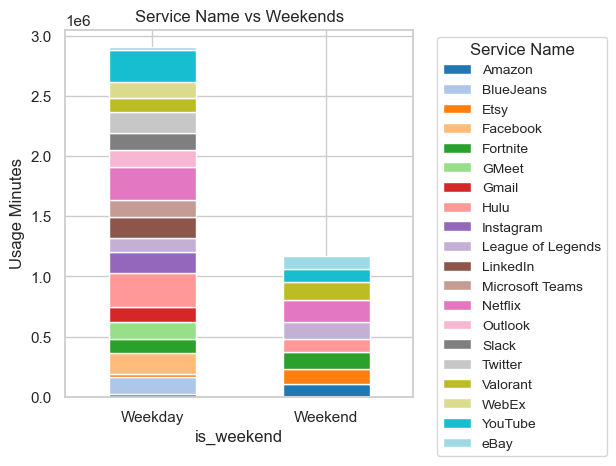